# Explore here

It's recommended to use this notebook for exploration purposes.

In [34]:
pip install pandas requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [36]:
import requests

# URL de la página a la que accedemos
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Encabezado de User-Agent
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

def scrape_data_tesla(url, headers):
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(response.status_code)
        raise Exception(f"Error al acceder a la URL: {url}. Código de estado: {response.status_code}")
    html_text = response.text
    print(html_text)
    return html_text

html_text = scrape_data_tesla(url, headers)

print(html_text)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtra

In [37]:
# Creamos la sopa
print(html_text)
soup = BeautifulSoup(html_text, 'html.parser')


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtra

In [38]:
# Encontar todas las tablas en el html 
all_tables = soup.find_all("table")
print("numero de tablas encontradas:", len(all_tables))
print(all_tables)

numero de tablas encontradas: 6
[<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2023</td>
<td style="text-align:center">$96,773</td>
</tr>
<tr>
<td style="text-align:center">2022</td>
<td style="text-align:center">$81,462</td>
</tr>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td

In [39]:
# Encuentra la tabla que contiene la información de "Tesla Quarterly Revenue"
target_table = None
tables = soup.find_all('table')
for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        target_table = table
        break

if target_table is not None:
    print("Se encontró la tabla con la información de 'Tesla Quarterly Revenue'")
    # Realiza las operaciones necesarias con la tabla
else:
    print("No se encontró ninguna tabla con la información de 'Tesla Quarterly Revenue'")

Se encontró la tabla con la información de 'Tesla Quarterly Revenue'


In [78]:
# Extraer los datos de la tabla
data_rows = target_table.find('tbody').find_all('tr')
table_data = []
for row in data_rows:
    row_data = [td.text.strip() for td in row.find_all('td')]
    print("Datos de la fila:", row_data)  # Imprimir los datos de la fila para debug
    table_data.append(row_data)

    # Crear un DataFrame con los datos y los encabezados
    df = pd.DataFrame(table_data, columns=['Date', 'Revenue'])

    # Imprimir el DataFrame
    print(df)

Datos de la fila: ['2023-12-31', '$25,167']
         Date  Revenue
0  2023-12-31  $25,167
Datos de la fila: ['2023-09-30', '$23,350']
         Date  Revenue
0  2023-12-31  $25,167
1  2023-09-30  $23,350
Datos de la fila: ['2023-06-30', '$24,927']
         Date  Revenue
0  2023-12-31  $25,167
1  2023-09-30  $23,350
2  2023-06-30  $24,927
Datos de la fila: ['2023-03-31', '$23,329']
         Date  Revenue
0  2023-12-31  $25,167
1  2023-09-30  $23,350
2  2023-06-30  $24,927
3  2023-03-31  $23,329
Datos de la fila: ['2022-12-31', '$24,318']
         Date  Revenue
0  2023-12-31  $25,167
1  2023-09-30  $23,350
2  2023-06-30  $24,927
3  2023-03-31  $23,329
4  2022-12-31  $24,318
Datos de la fila: ['2022-09-30', '$21,454']
         Date  Revenue
0  2023-12-31  $25,167
1  2023-09-30  $23,350
2  2023-06-30  $24,927
3  2023-03-31  $23,329
4  2022-12-31  $24,318
5  2022-09-30  $21,454
Datos de la fila: ['2022-06-30', '$16,934']
         Date  Revenue
0  2023-12-31  $25,167
1  2023-09-30  $23,350
2 

In [79]:
# Eliminar filas vacías o sin información
df = df.dropna()

# Convertir las columnas a tipos de datos numéricos
df['Revenue'] = df['Revenue'].str.replace('$', '').str.replace(',', '')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# Eliminar filas con valores nulos después de la conversión
df = df.dropna()

# Imprimir el DataFrame limpio
print(df)


          Date  Revenue
0   2023-12-31  25167.0
1   2023-09-30  23350.0
2   2023-06-30  24927.0
3   2023-03-31  23329.0
4   2022-12-31  24318.0
5   2022-09-30  21454.0
6   2022-06-30  16934.0
7   2022-03-31  18756.0
8   2021-12-31  17719.0
9   2021-09-30  13757.0
10  2021-06-30  11958.0
11  2021-03-31  10389.0
12  2020-12-31  10744.0
13  2020-09-30   8771.0
14  2020-06-30   6036.0
15  2020-03-31   5985.0
16  2019-12-31   7384.0
17  2019-09-30   6303.0
18  2019-06-30   6350.0
19  2019-03-31   4541.0
20  2018-12-31   7226.0
21  2018-09-30   6824.0
22  2018-06-30   4002.0
23  2018-03-31   3409.0
24  2017-12-31   3288.0
25  2017-09-30   2985.0
26  2017-06-30   2790.0
27  2017-03-31   2696.0
28  2016-12-31   2285.0
29  2016-09-30   2298.0
30  2016-06-30   1270.0
31  2016-03-31   1147.0
32  2015-12-31   1214.0
33  2015-09-30    937.0
34  2015-06-30    955.0
35  2015-03-31    940.0
36  2014-12-31    957.0
37  2014-09-30    852.0
38  2014-06-30    769.0
39  2014-03-31    621.0
40  2013-12-31  

/tmp/ipykernel_587/679662124.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Revenue'] = df['Revenue'].str.replace('$', '').str.replace(',', '')


In [80]:
print(df.head())

         Date  Revenue
0  2023-12-31  25167.0
1  2023-09-30  23350.0
2  2023-06-30  24927.0
3  2023-03-31  23329.0
4  2022-12-31  24318.0


In [83]:
import sqlite3

# Conectamos a la base de datos
conn = sqlite3.connect('tesla_revenue.db')
cur = conn.cursor()

# Crear la tabla
create_table_query = '''
CREATE TABLE IF NOT EXISTS tesla_revenue (
    Date TEXT PRIMARY KEY,
    Revenue REAL
);
'''

# Ejecutar la consulta para crear la tabla
cur.execute(create_table_query)

# Insertar los datos en la tabla
for index, row in df.iterrows():
    cur.execute("INSERT INTO tesla_revenue (Date, Revenue) VALUES (?, ?)", (row['Date'], row['Revenue']))

# Confirmar los cambios y cerrar la conexión
conn.commit()
conn.close()

print("Los datos se han almacenado correctamente en la base de datos SQLite.")

Los datos se han almacenado correctamente en la base de datos SQLite.


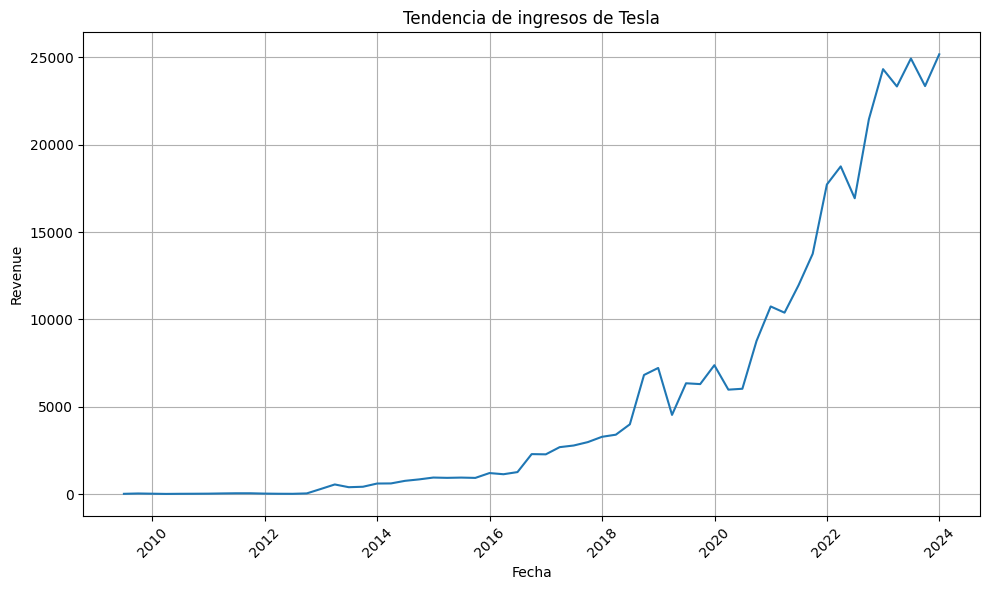

In [95]:
# Visualizar los datos
# Gráfico de lineas 
# Importamos la función AutoDateLocater
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Revenue'])
plt.title('Tendencia de ingresos de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Revenue')
plt.grid(True)

# Ajustar los intervalos y el formato de las fechas en el eje x
locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Rotar las fechas para mejorar la legibilidad de las fechas 
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

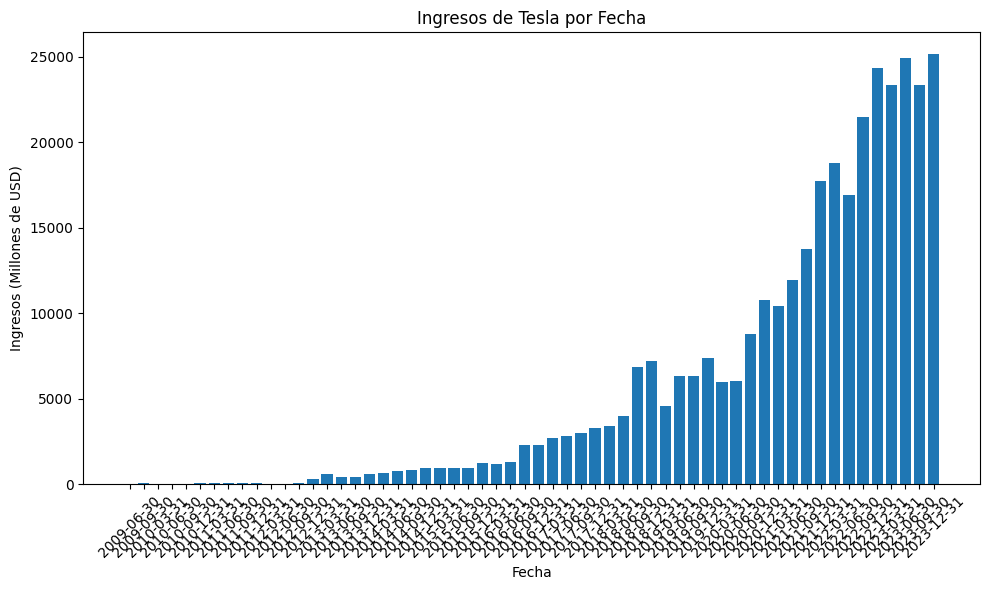

In [87]:
# Graficos de barras
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Revenue'])
plt.title('Ingresos de Tesla por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (Millones de USD)')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()  # Invertir el eje x para mostrar las fechas en orden descendente
plt.tight_layout()
plt.show()

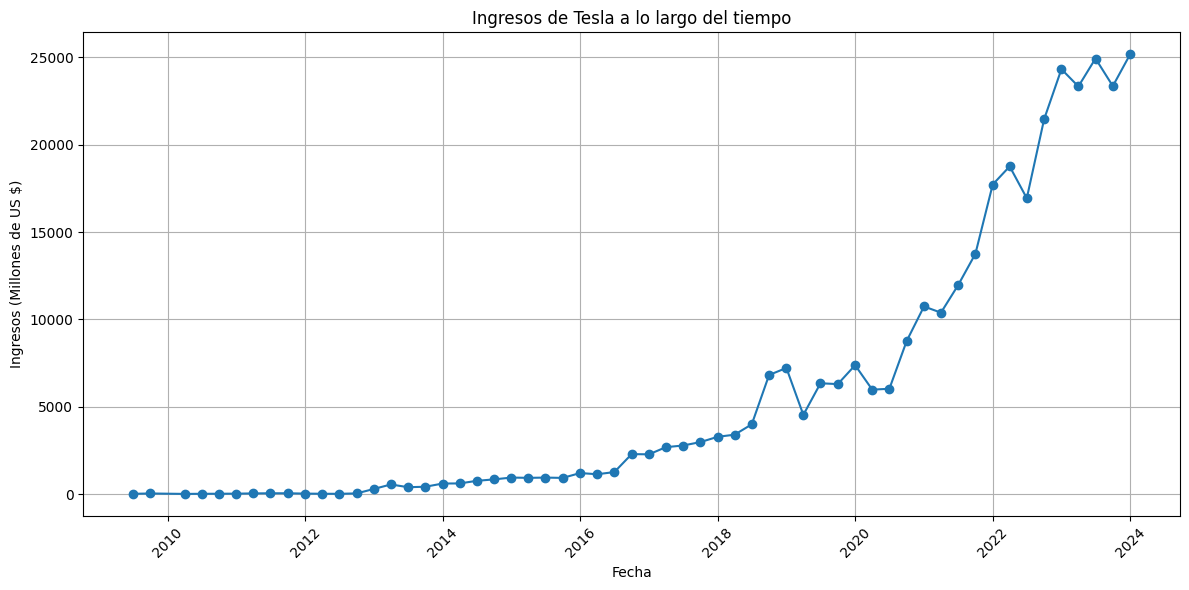

In [91]:
# Graficar los ingresos de Tesla a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Revenue'], marker='o', linestyle='-')
plt.title('Ingresos de Tesla a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (Millones de US $)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
print("hello")

hello
